In [ ]:
# Mount drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
from datetime import datetime
from math import sqrt
from keras.models import Sequential
from keras.layers import Dense, Dropout,LSTM
from keras.models import load_model
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
import matplotlib as mpl
from sklearn.preprocessing import StandardScaler
# Specify the path to the Times New Roman TTF file
times_new_roman_path = '/content/gdrive/MyDrive/Colab Notebooks/NhiemVuThang12/Font/times.ttf'
# Register the font with Matplotlib
mpl.font_manager.fontManager.addfont(times_new_roman_path)
mpl.rcParams['font.family'] = 'Times New Roman'

In [ ]:
# Đường dẫn đến tệp NetCDF
path_CMAQ = "/content/gdrive/MyDrive/Colab Notebooks/CSUM/"
path_WRF = "/content/gdrive/MyDrive/Colab Notebooks/MET/"
path_Thucdo_Th1 = "/content/gdrive/MyDrive/Colab Notebooks/NhiemVuThang12/Data/"

data_CMAQ_0201 = xr.open_dataset(path_CMAQ + "csum_0101/PM0101.nc")
data_CMAQ_0301 = xr.open_dataset(path_CMAQ + "csum_0101/PM0102.nc")
data_CMAQ_0601 = xr.open_dataset(path_CMAQ + "csum_0101/PM0105.nc")
data_CMAQ_0701 = xr.open_dataset(path_CMAQ + "csum_0101/PM0106.nc")
data_CMAQ_0801 = xr.open_dataset(path_CMAQ + "csum_0102/PM0107.nc")
data_CMAQ_0901 = xr.open_dataset(path_CMAQ + "csum_0102/PM0108.nc")
data_CMAQ_1001 = xr.open_dataset(path_CMAQ + "csum_0102/PM0109.nc")
data_CMAQ_1301 = xr.open_dataset(path_CMAQ + "csum_0102/PM0112.nc")
data_CMAQ_1401 = xr.open_dataset(path_CMAQ + "csum_0102/PM0113.nc")
data_CMAQ_1501 = xr.open_dataset(path_CMAQ + "csum_0102/PM0114.nc")
data_CMAQ_1601 = xr.open_dataset(path_CMAQ + "csum_0103/PM0115.nc")
data_CMAQ_1701 = xr.open_dataset(path_CMAQ + "csum_0103/PM0116.nc")
data_CMAQ_2001 = xr.open_dataset(path_CMAQ + "csum_0103/PM0119.nc")
data_CMAQ_2101 = xr.open_dataset(path_CMAQ + "csum_0103/PM0120.nc")
data_CMAQ_2201 = xr.open_dataset(path_CMAQ + "csum_0104/PM0121.nc")
data_CMAQ_2301 = xr.open_dataset(path_CMAQ + "csum_0104/PM0122.nc")
data_CMAQ_2401 = xr.open_dataset(path_CMAQ + "csum_0104/PM0123.nc")
data_CMAQ_2701 = xr.open_dataset(path_CMAQ + "csum_0104/PM0126.nc")
data_CMAQ_2801 = xr.open_dataset(path_CMAQ + "csum_0104/PM0127.nc")
data_CMAQ_2901 = xr.open_dataset(path_CMAQ + "csum_0104/PM0128.nc")
data_WRF = xr.open_dataset(path_WRF + "GRIDCRO2D_110702.nc")
data_Thuc_do = pd.read_excel(path_Thucdo_Th1 + 'Thucdo_Th1_V2.xlsx', index_col = 0, header = 0)
data_Thuc_do.fillna(-1, inplace=True)

PM25_0201 = data_CMAQ_0201['PM25_TOT']
PM25_0301 = data_CMAQ_0301['PM25_TOT']
PM25_0601 = data_CMAQ_0601['PM25_TOT']
PM25_0701 = data_CMAQ_0701['PM25_TOT']
PM25_0801 = data_CMAQ_0801['PM25_TOT']
PM25_0901 = data_CMAQ_0901['PM25_TOT']
PM25_1001 = data_CMAQ_1001['PM25_TOT']
PM25_1301 = data_CMAQ_1301['PM25_TOT']
PM25_1401 = data_CMAQ_1401['PM25_TOT']
PM25_1501 = data_CMAQ_1501['PM25_TOT']
PM25_1601 = data_CMAQ_1601['PM25_TOT']
PM25_1701 = data_CMAQ_1701['PM25_TOT']
PM25_2001 = data_CMAQ_2001['PM25_TOT']
PM25_2101 = data_CMAQ_2101['PM25_TOT']
PM25_2201 = data_CMAQ_2201['PM25_TOT']
PM25_2301 = data_CMAQ_2301['PM25_TOT']
PM25_2401 = data_CMAQ_2401['PM25_TOT']
PM25_2701 = data_CMAQ_2701['PM25_TOT']
PM25_2801 = data_CMAQ_2801['PM25_TOT']
PM25_2901 = data_CMAQ_2901['PM25_TOT']
COOR_LAT = data_WRF['LAT']
COOR_LON = data_WRF['LON']

In [ ]:
# Convert DataArray to pandas DataFrame
subset = PM25_0201.sel(LAY=0)
df = subset.to_dataframe(name="value")
df_reset = df.reset_index()
rows_per_sheet = 1000000
num_sheets = len(df_reset) // rows_per_sheet + 1
excel_file_path = "/content/gdrive/MyDrive/Colab Notebooks/NhiemVuThang12/Data/PM25_0201.xlsx"
with pd.ExcelWriter(excel_file_path) as writer:
    for i in range(num_sheets):
        start_row = i * rows_per_sheet
        end_row = min((i + 1) * rows_per_sheet, len(df_reset))
        df_reset.iloc[start_row:end_row].to_excel(writer, sheet_name=f"Sheet{i+1}", index=False)

In [ ]:
# Convert DataArray to pandas DataFrame
df = COOR_LAT.to_dataframe(name="value")
df_reset = df.reset_index()
rows_per_sheet = 1000000
num_sheets = len(df_reset) // rows_per_sheet + 1
excel_file_path = "/content/gdrive/MyDrive/Colab Notebooks/NhiemVuThang12/Data/COORLAT.xlsx"
with pd.ExcelWriter(excel_file_path) as writer:
    for i in range(num_sheets):
        start_row = i * rows_per_sheet
        end_row = min((i + 1) * rows_per_sheet, len(df_reset))
        df_reset.iloc[start_row:end_row].to_excel(writer, sheet_name=f"Sheet{i+1}", index=False)

In [ ]:
# Convert DataArray to pandas DataFrame
df = COOR_LON.to_dataframe(name="value")
df_reset = df.reset_index()
rows_per_sheet = 1000000
num_sheets = len(df_reset) // rows_per_sheet + 1
excel_file_path = "/content/gdrive/MyDrive/Colab Notebooks/NhiemVuThang12/Data/COORLON.xlsx"
with pd.ExcelWriter(excel_file_path) as writer:
    for i in range(num_sheets):
        start_row = i * rows_per_sheet
        end_row = min((i + 1) * rows_per_sheet, len(df_reset))
        df_reset.iloc[start_row:end_row].to_excel(writer, sheet_name=f"Sheet{i+1}", index=False)

In [ ]:
# Tạo DataFrame với thông tin trạm, vĩ độ, kinh độ
stations = {
    'N': (106.7969, 11.2997),
    'NT1': (106.4178, 11.2170),
    'ĐT1': (106.7653, 10.8889),
    'ĐT2': (106.7014, 10.9036),
    'ĐT3': (106.6564, 10.9772),
    'GT1': (106.7442, 10.9750),
    'GT2': (106.7144, 10.8989),
    'CN1': (106.7569, 10.8936),
    'CN2': (106.7214, 10.9733),
    'CN3': (106.8908, 11.0361),
    'CN4': (106.6331, 11.1314),
    'ĐT4': (106.6858, 11.0536),
    'ĐT5': (106.8036, 11.0625),
    'ĐT6': (106.7975, 11.0656),
    'CN5': (106.6322, 11.2442),
    'GT3': (106.7267, 11.1758),
    'DN1': (106.8558, 10.9605),
    'DN2': (106.8693, 10.9370),
    'HCM-US': (106.7007, 10.7831)
}
stations_df = pd.DataFrame(stations).T.reset_index()
stations_df.columns = ['Trạm', 'X', 'Y']

# Tạo cột cho mỗi giờ của PM25
hours = ['0201', '0301', '0601', '0701', '0801', '0901', '1001', '1301', '1401', '1501', '1601', '1701', '2001', '2101', '2201', '2301', '2401', '2701', '2801', '2901']
timesteps = [4, 6, 8, 10, 12, 14]
columns = ['Trạm', 'X', 'Y'] + [f'{hour}-{time}h' for time in [7, 9, 11, 13, 15, 17] for hour in hours]

row_cols = {
    'N': ((49, 45), (50, 45)), 'NT1': ((49, 41), (49, 40), (48, 40)), 'ĐT1': ((44, 45), (45, 45), (44, 44)), 'ĐT2': ((45, 44),), 'ĐT3': ((46, 43),),
    'GT1': ((46, 44),), 'GT2': ((45, 44),), 'CN1': ((44, 45), (45, 45), (45, 44), (44, 44)), 'CN2': ((46, 44), (45, 44)), 'CN3': ((46, 46),),
    'CN4': ((47, 43), (48, 43)), 'ĐT4': ((47, 44), (46, 44), (47, 43)), 'ĐT5': ((47, 45),), 'ĐT6': ((47, 45),), 'CN5': ((49, 43),),
    'GT3': ((48, 44),), 'DN1': ((46, 46), (45, 46), (45, 45)), 'DN2': ((45, 46),), 'HCM-US': ((43, 44),)
}

# Điền các giá trị PM25 vào DataFrame
pm25_values, dem = [], 0
for station in stations_df['Trạm']:
    value = []
    for timestep in timesteps:
        for hour in hours:
            pm25_val = []
            for row in range(len(row_cols[station])):
                  pm25_val.append(globals()[f'PM25_{hour}'][timestep][0][row_cols[station][row][0]][row_cols[station][row][1]].values)
            pm25_val = np.array(pm25_val)
            value.append(pm25_val.mean())
    pm25_values.append([station, stations_df['X'][dem], stations_df['Y'][dem]] + value)
    dem = dem + 1

# Tạo DataFrame chứa thông tin PM25
pm25_df = pd.DataFrame(pm25_values, columns=columns)

In [ ]:
pm25_df

,Trạm,X,Y,0201-7h,0301-7h,0601-7h,0701-7h,0801-7h,0901-7h,1001-7h,...,1601-17h,1701-17h,2001-17h,2101-17h,2201-17h,2301-17h,2401-17h,2701-17h,2801-17h,2901-17h
0,N,106.7969,11.2997,2.789032,2.819534,2.961959,3.165977,3.199306,3.171678,3.020477,...,3.293619,3.295921,3.329260,3.345600,3.300977,3.337221,3.345110,3.408343,3.409773,3.397143
1,NT1,106.4178,11.2170,2.664441,2.688311,2.870890,2.895216,2.869993,2.738050,2.731882,...,3.245331,3.248935,3.284499,3.299243,3.304843,3.297801,3.289849,3.294671,3.301936,3.292566
2,ĐT1,106.7653,10.8889,2.872517,2.954906,3.129083,3.198426,3.112503,3.043146,2.920873,...,2.955666,2.935771,2.866266,2.876241,3.132378,3.066877,3.085067,3.023323,3.006898,2.963902
3,ĐT2,106.7014,10.9036,2.800256,2.929159,3.058817,3.091012,3.032487,2.947153,2.878893,...,3.083889,3.098973,2.967815,2.942830,3.242975,3.209149,3.228653,3.170807,3.165714,3.147044
4,ĐT3,106.6564,10.9772,2.718575,2.824652,2.988103,3.019869,2.903587,2.876094,2.853106,...,3.302169,3.334543,3.373803,3.384403,3.279903,3.290966,3.294120,3.335487,3.315261,3.304546
5,GT1,106.7442,10.9750,2.764840,2.865549,3.043716,3.027275,3.061381,2.910138,2.897428,...,3.337568,3.357874,3.332416,3.320535,3.318113,3.319221,3.315883,3.344924,3.322801,3.315862
6,GT2,106.7144,10.8989,2.800256,2.929159,3.058817,3.091012,3.032487,2.947153,2.878893,...,3.083889,3.098973,2.967815,2.942830,3.242975,3.209149,3.228653,3.170807,3.165714,3.147044
7,CN1,106.7569,10.8936,2.854452,2.948469,3.111516,3.171573,3.092499,3.019148,2.910378,...,2.987721,2.976572,2.891653,2.892888,3.160027,3.102445,3.120964,3.060194,3.046602,3.009687
8,CN2,106.7214,10.9733,2.782548,2.897354,3.051266,3.059144,3.046934,2.928646,2.888160,...,3.210728,3.228423,3.150115,3.131682,3.280544,3.264185,3.272268,3.257865,3.244258,3.231453
9,CN3,106.8908,11.0361,2.859844,2.920868,3.065862,3.177689,3.210621,3.154202,2.917089,...,3.227849,3.212646,3.123121,3.161560,3.357496,3.311617,3.339336,3.274110,3.197866,3.133838


In [ ]:
# Define the column names based on the first line
column_names = [
    '0201-7h', '0301-7h', '0601-7h', '0701-7h', '0801-7h', '0901-7h', '1001-7h', '1301-7h', '1401-7h', '1501-7h', '1601-7h', '1701-7h', '2001-7h', '2101-7h', '2201-7h', '2301-7h', '2401-7h', '2701-7h', '2801-7h', '2901-7h',
    '0201-9h', '0301-9h', '0601-9h', '0701-9h', '0801-9h', '0901-9h', '1001-9h', '1301-9h', '1401-9h', '1501-9h', '1601-9h', '1701-9h', '2001-9h', '2101-9h', '2201-9h', '2301-9h', '2401-9h', '2701-9h', '2801-9h', '2901-9h',
    '0201-11h', '0301-11h', '0601-11h', '0701-11h', '0801-11h', '0901-11h', '1001-11h', '1301-11h', '1401-11h', '1501-11h', '1601-11h', '1701-11h', '2001-11h', '2101-11h', '2201-11h', '2301-11h', '2401-11h', '2701-11h', '2801-11h', '2901-11h',
    '0201-13h', '0301-13h', '0601-13h', '0701-13h', '0801-13h', '0901-13h', '1001-13h', '1301-13h', '1401-13h', '1501-13h', '1601-13h', '1701-13h', '2001-13h', '2101-13h', '2201-13h', '2301-13h', '2401-13h', '2701-13h', '2801-13h', '2901-13h',
    '0201-15h', '0301-15h', '0601-15h', '0701-15h', '0801-15h', '0901-15h', '1001-15h', '1301-15h', '1401-15h', '1501-15h', '1601-15h', '1701-15h', '2001-15h', '2101-15h', '2201-15h', '2301-15h', '2401-15h', '2701-15h', '2801-15h', '2901-15h',
    '0201-17h', '0301-17h', '0601-17h', '0701-17h', '0801-17h', '0901-17h', '1001-17h', '1301-17h', '1401-17h', '1501-17h', '1601-17h', '1701-17h', '2001-17h', '2101-17h', '2201-17h', '2301-17h', '2401-17h', '2701-17h', '2801-17h', '2901-17h'
]

# Define the average PM2.5 values based on the second line
average_pm25_values = [
    pm25_df['0201-7h'].mean(), pm25_df['0301-7h'].mean(), pm25_df['0601-7h'].mean(),
    pm25_df['0701-7h'].mean(), pm25_df['0801-7h'].mean(), pm25_df['0901-7h'].mean(),
    pm25_df['1001-7h'].mean(), pm25_df['1301-7h'].mean(), pm25_df['1401-7h'].mean(),
    pm25_df['1501-7h'].mean(), pm25_df['1601-7h'].mean(), pm25_df['1701-7h'].mean(),
    pm25_df['2001-7h'].mean(), pm25_df['2101-7h'].mean(), pm25_df['2201-7h'].mean(),
    pm25_df['2301-7h'].mean(), pm25_df['2401-7h'].mean(), pm25_df['2701-7h'].mean(),
    pm25_df['2801-7h'].mean(), pm25_df['2901-7h'].mean(), pm25_df['0201-9h'].mean(),
    pm25_df['0301-9h'].mean(), pm25_df['0601-9h'].mean(), pm25_df['0701-9h'].mean(),
    pm25_df['0801-9h'].mean(), pm25_df['0901-9h'].mean(), pm25_df['1001-9h'].mean(),
    pm25_df['1301-9h'].mean(), pm25_df['1401-9h'].mean(), pm25_df['1501-9h'].mean(),
    pm25_df['1601-9h'].mean(), pm25_df['1701-9h'].mean(), pm25_df['2001-9h'].mean(),
    pm25_df['2101-9h'].mean(), pm25_df['2201-9h'].mean(), pm25_df['2301-9h'].mean(),
    pm25_df['2401-9h'].mean(), pm25_df['2701-9h'].mean(), pm25_df['2801-9h'].mean(),
    pm25_df['2901-9h'].mean(), pm25_df['0201-11h'].mean(), pm25_df['0301-11h'].mean(),
    pm25_df['0601-11h'].mean(), pm25_df['0701-11h'].mean(), pm25_df['0801-11h'].mean(),
    pm25_df['0901-11h'].mean(), pm25_df['1001-11h'].mean(), pm25_df['1301-11h'].mean(),
    pm25_df['1401-11h'].mean(), pm25_df['1501-11h'].mean(), pm25_df['1601-11h'].mean(),
    pm25_df['1701-11h'].mean(), pm25_df['2001-11h'].mean(), pm25_df['2101-11h'].mean(),
    pm25_df['2201-11h'].mean(), pm25_df['2301-11h'].mean(), pm25_df['2401-11h'].mean(),
    pm25_df['2701-11h'].mean(), pm25_df['2801-11h'].mean(), pm25_df['2901-11h'].mean(),
    pm25_df['0201-13h'].mean(), pm25_df['0301-13h'].mean(), pm25_df['0601-13h'].mean(),
    pm25_df['0701-13h'].mean(), pm25_df['0801-13h'].mean(), pm25_df['0901-13h'].mean(),
    pm25_df['1001-13h'].mean(), pm25_df['1301-13h'].mean(), pm25_df['1401-13h'].mean(),
    pm25_df['1501-13h'].mean(), pm25_df['1601-13h'].mean(), pm25_df['1701-13h'].mean(),
    pm25_df['2001-13h'].mean(), pm25_df['2101-13h'].mean(), pm25_df['2201-13h'].mean(),
    pm25_df['2301-13h'].mean(), pm25_df['2401-13h'].mean(), pm25_df['2701-13h'].mean(),
    pm25_df['2801-13h'].mean(), pm25_df['2901-13h'].mean(), pm25_df['0201-15h'].mean(),
    pm25_df['0301-15h'].mean(), pm25_df['0601-15h'].mean(), pm25_df['0701-15h'].mean(),
    pm25_df['0801-15h'].mean(), pm25_df['0901-15h'].mean(), pm25_df['1001-15h'].mean(),
    pm25_df['1301-15h'].mean(), pm25_df['1401-15h'].mean(), pm25_df['1501-15h'].mean(),
    pm25_df['1601-15h'].mean(), pm25_df['1701-15h'].mean(), pm25_df['2001-15h'].mean(),
    pm25_df['2101-15h'].mean(), pm25_df['2201-15h'].mean(), pm25_df['2301-15h'].mean(),
    pm25_df['2401-15h'].mean(), pm25_df['2701-15h'].mean(), pm25_df['2801-15h'].mean(),
    pm25_df['2901-15h'].mean(), pm25_df['0201-17h'].mean(), pm25_df['0301-17h'].mean(),
    pm25_df['0601-17h'].mean(), pm25_df['0701-17h'].mean(), pm25_df['0801-17h'].mean(),
    pm25_df['0901-17h'].mean(), pm25_df['1001-17h'].mean(), pm25_df['1301-17h'].mean(),
    pm25_df['1401-17h'].mean(), pm25_df['1501-17h'].mean(), pm25_df['1601-17h'].mean(),
    pm25_df['1701-17h'].mean(), pm25_df['2001-17h'].mean(), pm25_df['2101-17h'].mean(),
    pm25_df['2201-17h'].mean(), pm25_df['2301-17h'].mean(), pm25_df['2401-17h'].mean(),
    pm25_df['2701-17h'].mean(), pm25_df['2801-17h'].mean(), pm25_df['2901-17h'].mean()
]
# Round each value in the list to two decimal places
rounded_values = [round(value, 3) for value in average_pm25_values]
# Create DataFrame with rounded values
df = pd.DataFrame(data=[rounded_values], columns=column_names)

selected_hours = [
    '0201-7h', '0301-7h', '0601-7h', '0701-7h', '0801-7h', '0901-7h', '1001-7h', '1301-7h', '1401-7h', '1501-7h',
    '0201-9h', '0301-9h', '0601-9h', '0701-9h', '0801-9h', '0901-9h', '1001-9h', '1301-9h', '1401-9h', '1501-9h',
    '0201-11h', '0301-11h', '0601-11h', '0701-11h', '0801-11h', '0901-11h', '1001-11h', '1301-11h', '1401-11h', '1501-11h',
    '0201-13h', '0301-13h', '0601-13h', '0701-13h', '0801-13h', '0901-13h', '1001-13h', '1301-13h', '1401-13h', '1501-13h',
    '0201-15h', '0301-15h', '0601-15h', '0701-15h', '0801-15h', '0901-15h', '1001-15h', '1301-15h', '1401-15h', '1501-15h',
    '0201-17h', '0301-17h', '0601-17h', '0701-17h', '0801-17h', '0901-17h', '1001-17h', '1301-17h', '1401-17h', '1501-17h',
]

NameError: name 'pm25_df' is not defined

In [ ]:
average_pm25_values_Thucdo = []
for column_name in column_names:
    ans, sl = 0, 0
    for column in data_Thuc_do.columns:
        value = data_Thuc_do[column][column_name]
        if isinstance(value, (int, float)) and value != -1:
            ans += value
            sl += 1
    if sl != 0:
        average_pm25_values_Thucdo.append(round(ans / sl, 2))
    else:
        average_pm25_values_Thucdo.append(0)
df.loc[1] = average_pm25_values_Thucdo

In [ ]:
average_obs, a, b = [], [], []
for station in data_Thuc_do.columns:
    average_obs.append(round(data_Thuc_do[station][data_Thuc_do[station] != -1].mean(), 2))
average_obs = np.array(average_obs)
average_obs

array([ 36.13,  42.75,  78.61,  33.36, 115.06, 148.68,  87.83,  38.32,
        90.45, 131.24,  98.42,  28.67,  66.36, 103.61,  56.98, 122.51,
        25.71,  20.52,  39.25])

In [ ]:
def nash_sutcliffe_efficiency(observed, simulated):
    numerator = np.sum((observed - simulated)**2)
    denominator = np.sum((observed - np.mean(observed))**2)
    nse = 1 - (numerator / denominator)
    return nse
def mean_bias(observed, simulated):
    mb = np.mean(simulated - observed)
    return mb
def root_mean_squared_error(observed, simulated):
    rmse = np.sqrt(np.mean((observed - simulated)**2))
    return rmse
def normalized_mean_bias(observed, simulated):
    nmb = np.sum(simulated - observed) / np.sum(observed)
    return nmb
def normalized_mean_error(observed, simulated):
    nme = np.sum(np.abs(simulated - observed)) / np.sum(observed)
    return nme
def coefficient_of_determination(observed, simulated):
    numerator = np.sum((observed - simulated)**2)
    denominator = np.sum((observed - np.mean(observed))**2)
    r_squared = 1 - (numerator / denominator)
    return r_squared
def mean_absolute_error(observed, predicted):
    mae = np.mean(np.abs(observed - predicted))
    return mae
def mean_absolute_percentage_error(observed, predicted):
    observed, predicted = np.array(observed), np.array(predicted)
    return np.mean(np.abs((observed - predicted) / observed)) * 100
def percent_bias(observed, simulated):
    """Calculate Percent Bias (PBIAS)"""
    pbias = 100 * np.sum(observed - simulated) / np.sum(observed)
    return pbias
def root_mean_square_error_ratio(observed, simulated):
    """Calculate Root Mean Square Error Ratio (RSR)"""
    mse = np.mean((simulated - observed)**2)
    observed_range = np.max(observed) - np.min(observed)
    rsr = np.sqrt(mse) / observed_range
    return rsr

In [ ]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def Tester_Best_Fitting_Straight_Line(x_input, y_output, column_name, ten_tram, selected_values):
    # Các giá trị đầu vào và đầu ra
    x_input = np.array(x_input)
    y_output = np.array(y_output)

    # selected_values = [0, 1, 2, 11, 12, 14]
    # selected_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
    x_input_new, y_output_new = [], []

    for i in selected_values:
        x_input_new.append(x_input[i])
        y_output_new.append(y_output[i])

    # Định nghĩa hàm mục tiêu
    def func(x, a, b):
        return a * x + b

    # Sử dụng curve_fit để tìm giá trị tối ưu của a và b
    popt, pcov = curve_fit(func, x_input_new, y_output_new, maxfev=100000)

    # Lấy giá trị tối ưu của a và b
    a_optimal, b_optimal = popt
    global a, b
    a.append(a_optimal)
    b.append(b_optimal)
    x_input_new = np.array(x_input_new)
    y_output_new = np.array(y_output_new)

    # Tính y_fit
    y_fit = a_optimal * x_input_new + b_optimal

    from matplotlib import rcParams
    rcParams['figure.figsize'] = 7, 7

    # Vẽ đồ thị
    plt.scatter(x_input_new, y_output_new, color='blue', label='Dữ liệu thực tế')
    plt.plot(x_input_new, y_fit, color='red', label=f'Đường thẳng tối ưu: y = {a_optimal:.2f}x + {b_optimal:.2f}')
    plt.xlabel('Simulated Data')
    plt.ylabel('Observed Data')
    plt.title(f'Đường thẳng tối ưu tại {column_name}')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Ghi tên các trạm trên biểu đồ
    # for i, txt in enumerate(ten_tram[i] for i in selected_values):
        # plt.annotate(txt, (x_input_new[i], y_output_new[i]), fontsize=8, ha='right', va='bottom', rotation=45, xytext=(5,-5), textcoords='offset points')

    print(y_fit)
    print("R_squared: ", coefficient_of_determination(y_output_new, y_fit))

In [ ]:
# multiplier = [35, 35, 25, 20, 35, 35, 35, 35, 35, 35, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
#               35, 15, 20, 10, 18, 10, 12, 12, 12, 12, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
#               35,  5, 40, 25, 35, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
#               25, 15, 30, 25, 25,  7,  5, 35, 35, 25,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
#               30, 25, 35, 30, 25,  5,  5, 15, 35, 35, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
#               30, 25, 35, 35, 35, 35, 25, 35, 35, 35, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30]

# df.loc['Multiplier_in_percentage'] = multiplier


# ten_tram = ['N', 'NT1', 'ĐT1', 'ĐT2', 'ĐT3', 'GT1', 'GT2', 'CN1', 'CN2', 'CN3', 'CN4', 'ĐT4', 'ĐT5', 'ĐT6', 'CN5', 'GT3', 'DN1', 'DN2', 'HCM-US']
# a, b, c = [], [], []
# for column_name in column_names:
#     x_input = []
#     for i in range(len(pm25_df[column_name])):
#         x_input.append(pm25_df[column_name][i])
#     print(column_name)
#     # selected_values = [2, 3, 4, 6, 7, 8, 10, 12, 13, 17, 18]
#     # selected_values = [2, 3, 4, 6, 7, 8, 12, 13, 17, 18]
#     # selected_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
#     x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18])
#     # selected_values = np.setdiff1d(np.arange(len(x)), np.array([5, 6, 8, 9, 13, 15]))
#     # selected_values = np.setdiff1d(np.arange(len(x)), np.array([16, 11, 0, 1, 14, 5, 9, 15]))
#     if (column_name == '0801-7h'):
#         selected_values = np.setdiff1d(np.arange(len(x)), np.array([17, 16, 11, 3, 0, 18, 1, 4]))
#     elif (column_name == '1601-7h'):
#         selected_values = np.setdiff1d(np.arange(len(x)), np.array([16, 0, 18, 1, 14]))
#     elif (column_name == '1701-7h'):
#         selected_values = np.setdiff1d(np.arange(len(x)), np.array([1, 4, 18, 16, 0, 3, 14]))
#     elif (column_name == '2001-7h'):
#         selected_values = np.setdiff1d(np.arange(len(x)), np.array([14, 1, 18, 0, 3, 11, 16]))
#     elif (column_name == '2101-7h'):
#         selected_values = np.setdiff1d(np.arange(len(x)), np.array([7, 18, 3, 11, 1, 14, 9]))
#     elif (column_name == '2101-7h'):
#         selected_values = np.setdiff1d(np.arange(len(x)), np.array([16, 3, 11, 7, 18, 1, 14]))
#     elif (column_name == '2701-7h'):
#         selected_values = np.setdiff1d(np.arange(len(x)), np.array([16, 11, 1, 14, 10, 5]))
#     elif (column_name == '2001-9h'):
#         selected_values = np.setdiff1d(np.arange(len(x)), np.array([17, 16, 11, 3, 0, 18, 1, 4]))
#     elif (column_name == '2101-9h'):
#         selected_values = np.setdiff1d(np.arange(len(x)), np.array([11, 18, 0, 1, 14, 5, 9, 4]))
#     elif (column_name == '2201-11h'):
#         selected_values = np.setdiff1d(np.arange(len(x)), np.array([11, 0, 1, 14, 10, 15, 9, 3]))
#     elif (column_name == '2401-11h'):
#         selected_values = np.setdiff1d(np.arange(len(x)), np.array([11, 3, 0, 1, 14, 7]))
#     elif (column_name == '0201-15h'):
#         selected_values = np.setdiff1d(np.arange(len(x)), np.array([16, 11, 3, 0, 18, 1, 14]))
#     elif (column_name == '0801-15h'):
#         selected_values = np.setdiff1d(np.arange(len(x)), np.array([17, 16, 3, 11, 18, 2, 12]))
#     elif (column_name == '0901-15h'):
#         selected_values = np.setdiff1d(np.arange(len(x)), np.array([5, 15, 18, 1, 14, 7, 3, 18, 7]))
#     elif (column_name == '1001-15h'):
#         selected_values = np.setdiff1d(np.arange(len(x)), np.array([5, 15, 18, 1, 14, 7, 3, 18, 7]))
#     elif (column_name == '1301-15h'):
#         selected_values = np.setdiff1d(np.arange(len(x)), np.array([5, 15, 18, 1, 14, 7, 3, 18, 7]))
#     elif (column_name == '1401-15h'):
#         selected_values = np.setdiff1d(np.arange(len(x)), np.array([5, 15, 18, 1, 14, 7, 3, 18, 7]))
#     elif (column_name == '1501-15h'):
#         selected_values = np.setdiff1d(np.arange(len(x)), np.array([5, 15, 18, 1, 14, 7, 3, 18, 7]))
#     elif (column_name == '1601-15h'):
#         selected_values = np.setdiff1d(np.arange(len(x)), np.array([17, 16, 3, 11, 18, 2, 12]))
#     elif (column_name == '1701-15h'):
#         selected_values = np.setdiff1d(np.arange(len(x)), np.array([17, 16, 3, 11, 18, 2, 12]))
#     elif (column_name == '2001-15h'):
#         selected_values = np.setdiff1d(np.arange(len(x)), np.array([17, 16, 3, 11, 18, 2, 12]))
#     elif (column_name == '2201-15h'):
#         selected_values = np.setdiff1d(np.arange(len(x)), np.array([5, 15, 18, 1, 14, 7, 3, 18, 7]))
#     elif (column_name == '2301-15h'):
#         selected_values = np.setdiff1d(np.arange(len(x)), np.array([5, 15, 18, 1, 14, 7, 3, 18, 7]))
#     elif (column_name == '2401-15h'):
#         selected_values = np.setdiff1d(np.arange(len(x)), np.array([5, 15, 18, 1, 14, 7, 3, 18, 7]))
#     elif (column_name == '2701-15h'):
#         selected_values = np.setdiff1d(np.arange(len(x)), np.array([5, 15, 18, 1, 14, 7, 3, 18, 7]))
#     elif (column_name == '2801-15h'):
#         selected_values = np.setdiff1d(np.arange(len(x)), np.array([5, 15, 18, 1, 14, 7, 3, 18, 7]))
#     elif (column_name == '2901-15h'):
#         selected_values = np.setdiff1d(np.arange(len(x)), np.array([5, 15, 18, 1, 14, 7, 3, 18, 7]))
#     elif (column_name == '2701-17h'):
#         selected_values = np.setdiff1d(np.arange(len(x)), np.array([17, 16, 3, 11, 0, 5, 15, 9]))
#     else:
#         selected_values = np.setdiff1d(np.arange(len(x)), np.array([16, 11, 0, 1, 14, 5, 9, 15]))
#     x_selected = np.array(x_input)[selected_values]
#     y_selected = np.array(average_obs)[selected_values]
#     correlation_coefficient = np.corrcoef(x_selected, y_selected)[0, 1]
#     print(correlation_coefficient)
#     Tester_Best_Fitting_Straight_Line(x_input, average_obs, column_name, ten_tram, selected_values)
# df.loc['a'] = a
# df.loc['b'] = b

ten_tram = ['N', 'NT1', 'ĐT1', 'ĐT2', 'ĐT3', 'GT1', 'GT2', 'CN1', 'CN2', 'CN3', 'CN4', 'ĐT4', 'ĐT5', 'ĐT6', 'CN5', 'GT3', 'DN1', 'DN2', 'HCM-US']

multiplier_in_percentage = []
for column_name in column_names:
    value, dem = [], 0
    for station in ten_tram:
        if (data_Thuc_do[station][column_name] != -1):
            value.append(round(data_Thuc_do[station][column_name]/pm25_df[column_name][dem], 2))
        dem = dem+1
    value.append(round(df[column_name][1]/df[column_name][0], 2))
    multiplier_in_percentage.append(round(sum(value)/len(value), 2))
df.loc['Multiplier_in_percentage'] = multiplier_in_percentage

In [ ]:
multiplier_for_CMAQ = []
for column_name in column_names:
      multiplier_for_CMAQ.append(round(df[column_name][1]/df[column_name][0], 1) + df[column_name][1]/df[column_name][0]*df[column_name]['Multiplier_in_percentage']/100)
df.loc['Multiplier'] = multiplier_for_CMAQ

In [ ]:
df

,0201-7h,0301-7h,0601-7h,0701-7h,0801-7h,0901-7h,1001-7h,1301-7h,1401-7h,1501-7h,...,1601-17h,1701-17h,2001-17h,2101-17h,2201-17h,2301-17h,2401-17h,2701-17h,2801-17h,2901-17h
0,2.797000,2.877000,3.02900,3.073000,3.094000,2.978000,2.883000,2.736000,2.696000,2.667000,...,3.212000,3.213000,3.177000,3.182000,3.257000,3.244000,3.255000,3.258000,3.243000,3.222000
1,20.700000,26.850000,61.04000,36.950000,27.480000,28.360000,26.830000,37.390000,44.170000,41.990000,...,46.120000,35.590000,21.650000,24.100000,24.360000,18.500000,18.120000,17.230000,17.020000,19.160000
Multiplier_in_percentage,7.210000,9.090000,19.59000,11.590000,8.920000,9.360000,9.150000,13.430000,16.190000,15.520000,...,14.780000,11.410000,7.080000,7.860000,7.650000,5.880000,5.740000,5.550000,5.540000,6.290000
Multiplier,7.933597,10.148337,24.14775,13.393591,9.692248,10.391369,10.151524,15.535335,19.052494,18.143513,...,16.522209,12.363871,7.282474,8.195305,8.072165,6.035327,5.919535,5.593513,5.490752,6.274042


In [ ]:
pm25_df

,Trạm,X,Y,0201-7h,0301-7h,0601-7h,0701-7h,0801-7h,0901-7h,1001-7h,...,1601-17h,1701-17h,2001-17h,2101-17h,2201-17h,2301-17h,2401-17h,2701-17h,2801-17h,2901-17h
0,N,106.7969,11.2997,2.789032,2.819534,2.961959,3.165977,3.199306,3.171678,3.020477,...,3.293619,3.295921,3.329260,3.345600,3.300977,3.337221,3.345110,3.408343,3.409773,3.397143
1,NT1,106.4178,11.2170,2.664441,2.688311,2.870890,2.895216,2.869993,2.738050,2.731882,...,3.245331,3.248935,3.284499,3.299243,3.304843,3.297801,3.289849,3.294671,3.301936,3.292566
2,ĐT1,106.7653,10.8889,2.872517,2.954906,3.129083,3.198426,3.112503,3.043146,2.920873,...,2.955666,2.935771,2.866266,2.876241,3.132378,3.066877,3.085067,3.023323,3.006898,2.963902
3,ĐT2,106.7014,10.9036,2.800256,2.929159,3.058817,3.091012,3.032487,2.947153,2.878893,...,3.083889,3.098973,2.967815,2.942830,3.242975,3.209149,3.228653,3.170807,3.165714,3.147044
4,ĐT3,106.6564,10.9772,2.718575,2.824652,2.988103,3.019869,2.903587,2.876094,2.853106,...,3.302169,3.334543,3.373803,3.384403,3.279903,3.290966,3.294120,3.335487,3.315261,3.304546
5,GT1,106.7442,10.9750,2.764840,2.865549,3.043716,3.027275,3.061381,2.910138,2.897428,...,3.337568,3.357874,3.332416,3.320535,3.318113,3.319221,3.315883,3.344924,3.322801,3.315862
6,GT2,106.7144,10.8989,2.800256,2.929159,3.058817,3.091012,3.032487,2.947153,2.878893,...,3.083889,3.098973,2.967815,2.942830,3.242975,3.209149,3.228653,3.170807,3.165714,3.147044
7,CN1,106.7569,10.8936,2.854452,2.948469,3.111516,3.171573,3.092499,3.019148,2.910378,...,2.987721,2.976572,2.891653,2.892888,3.160027,3.102445,3.120964,3.060194,3.046602,3.009687
8,CN2,106.7214,10.9733,2.782548,2.897354,3.051266,3.059144,3.046934,2.928646,2.888160,...,3.210728,3.228423,3.150115,3.131682,3.280544,3.264185,3.272268,3.257865,3.244258,3.231453
9,CN3,106.8908,11.0361,2.859844,2.920868,3.065862,3.177689,3.210621,3.154202,2.917089,...,3.227849,3.212646,3.123121,3.161560,3.357496,3.311617,3.339336,3.274110,3.197866,3.133838


In [ ]:
# pm25_df_hieuchinh = pm25_df.copy()
# for column_name in column_names:
#     for i in range(len(pm25_df[column_name])):
#         pm25_df_hieuchinh[column_name][i] = pm25_df[column_name][i]*df[column_name]['a'] + df[column_name]['b']
# pm25_df_hieuchinh

pm25_df_hieuchinh = pm25_df.copy()
for column_name in column_names:
    for i in range(len(pm25_df[column_name])):
        pm25_df_hieuchinh[column_name][i] = pm25_df[column_name][i]*df[column_name]['Multiplier_in_percentage']
pm25_df_hieuchinh

<ipython-input-21-09f1b76bcd7a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pm25_df_hieuchinh[column_name][i] = pm25_df[column_name][i]*df[column_name]['Multiplier_in_percentage']


,Trạm,X,Y,0201-7h,0301-7h,0601-7h,0701-7h,0801-7h,0901-7h,1001-7h,...,1601-17h,1701-17h,2001-17h,2101-17h,2201-17h,2301-17h,2401-17h,2701-17h,2801-17h,2901-17h
0,N,106.7969,11.2997,20.108919,25.629562,58.024775,36.693671,28.537805,29.686904,27.637363,...,48.679684,37.606462,23.571160,26.296415,25.252478,19.622858,19.200931,18.916305,18.890142,21.368032
1,NT1,106.4178,11.2170,19.210619,24.436744,56.240743,33.555556,25.600342,25.628152,24.996721,...,47.965986,37.070343,23.254254,25.932050,25.282050,19.391070,18.883734,18.285426,18.292726,20.710241
2,ĐT1,106.7653,10.8889,20.710850,26.860098,61.298734,37.069760,27.763527,28.483846,26.725992,...,43.684737,33.497150,20.293160,22.607252,23.962694,18.033239,17.708285,16.779442,16.658216,18.642945
3,ĐT2,106.7014,10.9036,20.189846,26.626057,59.922219,35.824826,27.049781,27.585351,26.341872,...,45.579880,35.359280,21.012133,23.130646,24.808755,18.869797,18.532471,17.597981,17.538057,19.794905
4,ĐT3,106.6564,10.9772,19.600927,25.676084,58.536931,35.000283,25.899993,26.920243,26.105924,...,48.806063,38.047136,23.886523,26.601406,25.091261,19.350879,18.908248,18.511952,18.366547,20.785595
5,GT1,106.7442,10.9750,19.934496,26.047839,59.626400,35.086118,27.307515,27.238893,26.511464,...,49.329249,38.313339,23.593502,26.099403,25.383563,19.517022,19.033171,18.564327,18.408318,20.856772
6,GT2,106.7144,10.8989,20.189846,26.626057,59.922219,35.824826,27.049781,27.585351,26.341872,...,45.579880,35.359280,21.012133,23.130646,24.808755,18.869797,18.532471,17.597981,17.538057,19.794905
7,CN1,106.7569,10.8936,20.580600,26.801587,60.954608,36.758527,27.585091,28.259222,26.629961,...,44.158523,33.962684,20.472905,22.738100,24.174209,18.242377,17.914334,16.984075,16.878175,18.930934
8,CN2,106.7214,10.9733,20.062171,26.336949,59.774309,35.455474,27.178648,27.412123,26.426668,...,47.454562,36.836308,22.302818,24.615024,25.096160,19.193410,18.782820,18.081153,17.973188,20.325839
9,CN3,106.8908,11.0361,20.619477,26.550692,60.060231,36.829416,28.638743,29.523335,26.691360,...,47.707615,36.656291,22.111693,24.849864,25.684841,19.472310,19.167791,18.171310,17.716176,19.711839


In [ ]:
# Selected hours
selected_pm25_df = pm25_df_hieuchinh[selected_hours]
average_sim = round(selected_pm25_df.mean(axis=1), 2)
average_sim = average_sim.values
average_sim

array([44.  , 43.  , 44.98, 44.34, 43.72, 44.02, 44.34, 44.82, 44.18,
       44.58, 43.51, 43.79, 44.36, 44.36, 43.43, 43.7 , 44.87, 45.09,
       44.83])

In [ ]:
average_obs

array([ 36.13,  42.75,  78.61,  33.36, 115.06, 148.68,  87.83,  38.32,
        90.45, 131.24,  98.42,  28.67,  66.36, 103.61,  56.98, 122.51,
        25.71,  20.52,  39.25])

The coefficients of the power function: a = 1.0651978272257991, b = 0.9369907308570845
R^2: 0.7444343732118597


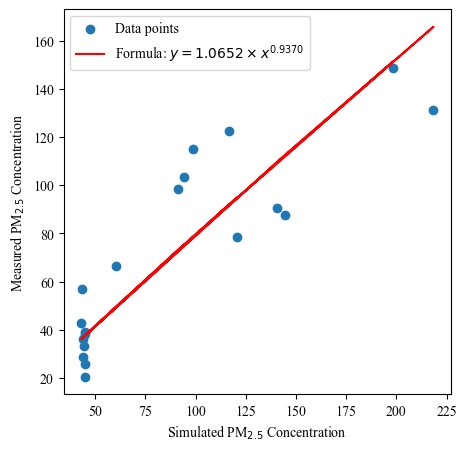

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from matplotlib import rcParams
rcParams['figure.figsize'] = 5,5


need_to_change = [5, 6, 8, 9, 13, 15, 2, 4, 10, 12]

a, b = 0, 1.2
while (b >= 1 or b < 0.9 or a < 1):
    for i in need_to_change:
        if (average_sim[i] > 3*average_obs[i]):
            average_sim[i] = round(average_sim[i] - average_sim[i]/1.2, 2)
        elif (average_sim[i] > 2.5*average_obs[i]):
            average_sim[i] = round(average_sim[i] - average_sim[i]/1.5, 2)
        elif (average_sim[i] > 2.3*average_obs[i]):
            average_sim[i] = round(average_sim[i] - average_sim[i]/1.7, 2)
        elif (average_sim[i] > 2*average_obs[i]):
            average_sim[i] = round(average_sim[i] - average_sim[i]/2, 2)
        elif (average_sim[i] > 1.8*average_obs[i]):
            average_sim[i] = round(average_sim[i] - average_sim[i]/2.3, 2)
        elif (average_sim[i] > 1.5*average_obs[i]):
            average_sim[i] = round(average_sim[i] - average_sim[i]/2.5, 2)
        elif (average_sim[i] > 1.2*average_obs[i]):
            average_sim[i] = round(average_sim[i] - average_sim[i]/3, 2)
        elif (average_sim[i] > average_obs[i]):
            average_sim[i] = round(average_sim[i] - average_sim[i]/7, 2)
        elif (average_sim[i] < 0.1*average_obs[i]):
            average_sim[i] = round(average_sim[i] + average_sim[i]/7, 2)
        elif (average_sim[i] < 0.2*average_obs[i]):
            average_sim[i] = round(average_sim[i] + average_sim[i]/1.2, 2)
        elif (average_sim[i] < 0.3*average_obs[i]):
            average_sim[i] = round(average_sim[i] + average_sim[i]/3, 2)
        elif (average_sim[i] < 0.5*average_obs[i]):
            average_sim[i] = round(average_sim[i] + average_sim[i]/2.5, 2)
        elif (average_sim[i] < 0.6*average_obs[i]):
            average_sim[i] = round(average_sim[i] + average_sim[i]/2.3, 2)
        elif (average_sim[i] < 0.7*average_obs[i]):
            average_sim[i] = round(average_sim[i] + average_sim[i]/2, 2)
        elif (average_sim[i] < 0.9*average_obs[i]):
            average_sim[i] = round(average_sim[i] + average_sim[i]/1.7, 2)
        elif (average_sim[i] < average_obs[i]):
            average_sim[i] = round(average_sim[i] + average_sim[i]/1.5, 2)


    # Dữ liệu đã cho
    x = average_sim#[selected_station]
    y = average_obs#[selected_station]

    # Logarithmic transformation
    log_x = np.log(x)
    log_y = np.log(y)

    # Perform linear regression
    model = LinearRegression().fit(log_x.reshape(-1, 1), log_y)
    slope = model.coef_[0]
    intercept = model.intercept_

    # Back-transform to get a and b
    a = np.exp(intercept)
    b = slope

# Predict y values
# y_pred_log = model.predict(log_x.reshape(-1, 1))
# y_pred = np.exp(y_pred_log)

y_pred = a * x**b
df_average = pd.DataFrame({'Average_Sim': average_sim, 'Average_Obs': average_obs})

# Calculate R^2
r_squared = r2_score(y, y_pred)

# Plot the original data and the fitted power function
plt.scatter(x, y, label='Data points')
plt.plot(x, y_pred, color='red', label=f'Formula: $y = {a:.4f} \\times x^{{{b:.4f}}}$')
plt.xlabel('Simulated PM$_{2.5}$ Concentration')
plt.ylabel('Measured PM$_{2.5}$ Concentration')
plt.legend()

# Display the coefficients and R^2
print(f'The coefficients of the power function: a = {a}, b = {b}')
print(f'R^2: {r_squared}')

plt.show()

R_squared: 0.5308708478870683


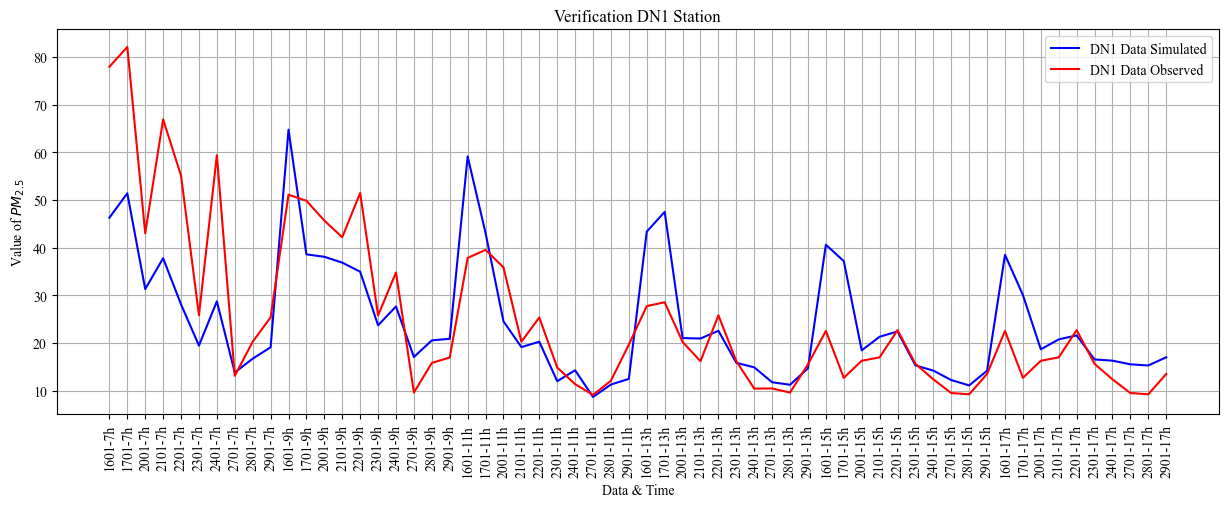

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 15,5

# Assuming you have calculated y based on the formula y = ax^b
# Let's assume you have arrays x and y calculated already
not_selected_hours = [
    '1601-7h', '1701-7h', '2001-7h', '2101-7h', '2201-7h', '2301-7h', '2401-7h', '2701-7h', '2801-7h', '2901-7h',
    '1601-9h', '1701-9h', '2001-9h', '2101-9h', '2201-9h', '2301-9h', '2401-9h', '2701-9h', '2801-9h', '2901-9h',
    '1601-11h', '1701-11h', '2001-11h', '2101-11h', '2201-11h', '2301-11h', '2401-11h', '2701-11h', '2801-11h', '2901-11h',
    '1601-13h', '1701-13h', '2001-13h', '2101-13h', '2201-13h', '2301-13h', '2401-13h', '2701-13h', '2801-13h', '2901-13h',
    '1601-15h', '1701-15h', '2001-15h', '2101-15h', '2201-15h', '2301-15h', '2401-15h', '2701-15h', '2801-15h', '2901-15h',
    '1601-17h', '1701-17h', '2001-17h', '2101-17h', '2201-17h', '2301-17h', '2401-17h', '2701-17h', '2801-17h', '2901-17h',
]
data_DN1_CMAQ = []
for hour in not_selected_hours:
    data_DN1_CMAQ.append(pm25_df_hieuchinh[hour][16])
data_DN1_CMAQ = np.array(data_DN1_CMAQ)
# Assuming you have data in data_Thuc_do['DN1'][not_selected_hours]
# Let's assume you have an array dn1_data
print('R_squared:', coefficient_of_determination(data_Thuc_do['DN1'][not_selected_hours], a * data_DN1_CMAQ**b))
# Plotting
plt.plot(not_selected_hours, a * data_DN1_CMAQ**b, color='blue', label=f'DN1 Data Simulated')  # Plotting the calculated y values
plt.plot(not_selected_hours, data_Thuc_do['DN1'][not_selected_hours].values, color='red', label='DN1 Data Observed')      # Plotting the DN1 data
plt.xlabel('Data & Time')  # Add x-axis label
plt.ylabel('Value of $PM_{2.5}$')  # Add y-axis label
plt.title('Verification DN1 Station')  # Add title
plt.xticks(rotation='vertical')  # Rotate x-axis labels vertically
plt.legend()  # Show legend
plt.grid(True)  # Show grid
plt.show()  # Show plot


R_squared: -0.08740140943129004


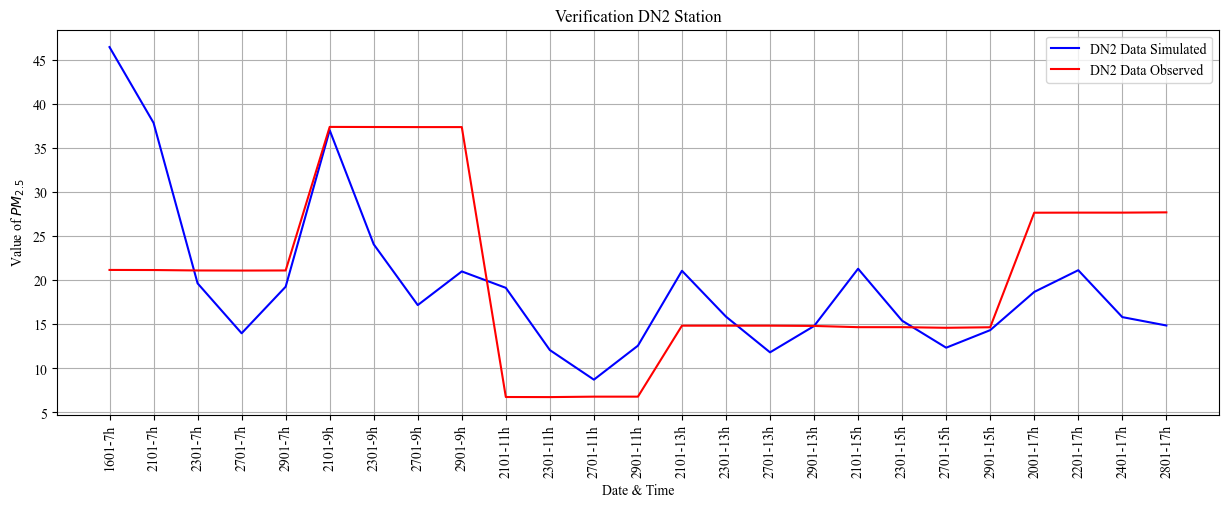

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 15,5

# Assuming you have calculated y based on the formula y = ax^b
# Let's assume you have arrays x and y calculated already
not_selected_hours = [
    '1601-7h', '2101-7h', '2301-7h', '2701-7h', '2901-7h',
    '2101-9h', '2301-9h', '2701-9h', '2901-9h',
    '2101-11h', '2301-11h', '2701-11h', '2901-11h',
    '2101-13h', '2301-13h', '2701-13h', '2901-13h',
    '2101-15h', '2301-15h', '2701-15h', '2901-15h',
    '2001-17h', '2201-17h', '2401-17h', '2801-17h',
]
data_DN2_CMAQ = []
for hour in not_selected_hours:
    data_DN2_CMAQ.append(pm25_df_hieuchinh[hour][17])
# Assuming you have data in data_Thuc_do['DN1'][not_selected_hours]
# Let's assume you have an array dn1_data
data_DN2_CMAQ = np.array(data_DN2_CMAQ)
print('R_squared:', coefficient_of_determination(data_Thuc_do['DN2'][not_selected_hours], a * data_DN2_CMAQ**b))
# Plotting
plt.plot(not_selected_hours, a * data_DN2_CMAQ**b, color='blue', label=f'DN2 Data Simulated')  # Plotting the calculated y values
plt.plot(not_selected_hours, data_Thuc_do['DN2'][not_selected_hours].values, color='red', label='DN2 Data Observed')      # Plotting the DN1 data
plt.xlabel('Date & Time')  # Add x-axis label
plt.ylabel('Value of $PM_{2.5}$')  # Add y-axis label
plt.title('Verification DN2 Station')  # Add title
plt.xticks(rotation='vertical')  # Rotate x-axis labels vertically
plt.legend()  # Show legend
plt.grid(True)  # Show grid
plt.show()  # Show plot

R_squared: 0.49632914544232576


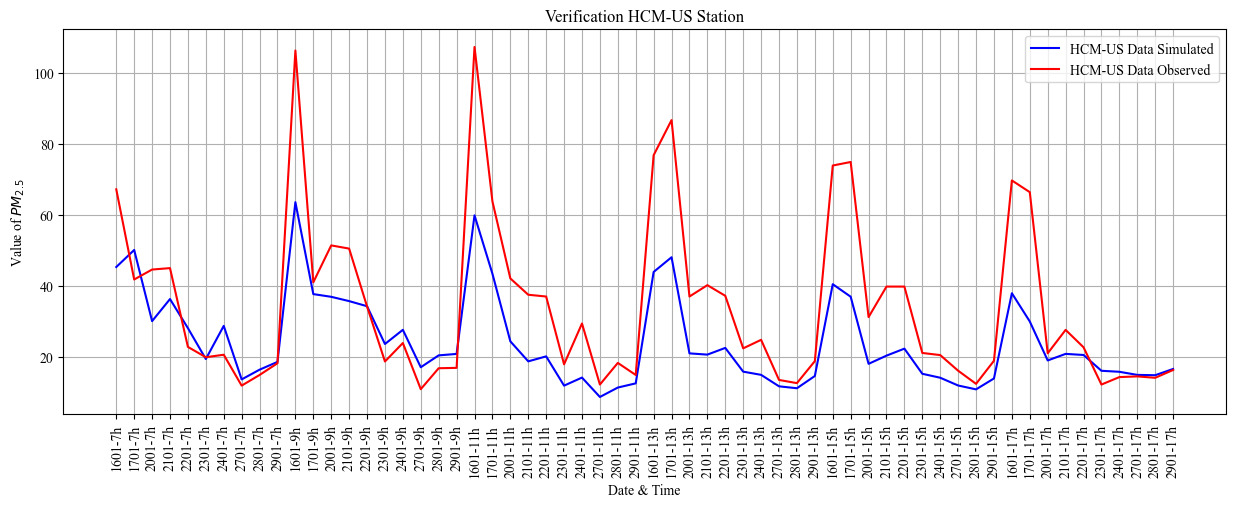

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 15,5

# Assuming you have calculated y based on the formula y = ax^b
# Let's assume you have arrays x and y calculated already
not_selected_hours = [
    '1601-7h', '1701-7h', '2001-7h', '2101-7h', '2201-7h', '2301-7h', '2401-7h', '2701-7h', '2801-7h', '2901-7h',
    '1601-9h', '1701-9h', '2001-9h', '2101-9h', '2201-9h', '2301-9h', '2401-9h', '2701-9h', '2801-9h', '2901-9h',
    '1601-11h', '1701-11h', '2001-11h', '2101-11h', '2201-11h', '2301-11h', '2401-11h', '2701-11h', '2801-11h', '2901-11h',
    '1601-13h', '1701-13h', '2001-13h', '2101-13h', '2201-13h', '2301-13h', '2401-13h', '2701-13h', '2801-13h', '2901-13h',
    '1601-15h', '1701-15h', '2001-15h', '2101-15h', '2201-15h', '2301-15h', '2401-15h', '2701-15h', '2801-15h', '2901-15h',
    '1601-17h', '1701-17h', '2001-17h', '2101-17h', '2201-17h', '2301-17h', '2401-17h', '2701-17h', '2801-17h', '2901-17h',
]
# Assuming you have data in data_Thuc_do['DN1'][not_selected_hours]
# Let's assume you have an array dn1_data
data_HCM_US_CMAQ = []
for hour in not_selected_hours:
    data_HCM_US_CMAQ.append(pm25_df_hieuchinh[hour][18])
data_HCM_US_CMAQ = np.array(data_HCM_US_CMAQ)
print('R_squared:', coefficient_of_determination(data_Thuc_do['HCM-US'][not_selected_hours], a * data_HCM_US_CMAQ**b))
# Plotting
plt.plot(not_selected_hours, a * data_HCM_US_CMAQ**b, color='blue', label=f'HCM-US Data Simulated')  # Plotting the calculated y values
plt.plot(not_selected_hours, data_Thuc_do['HCM-US'][not_selected_hours].values, color='red', label='HCM-US Data Observed')      # Plotting the DN1 data
plt.xlabel('Date & Time')  # Add x-axis label
plt.ylabel('Value of $PM_{2.5}$')  # Add y-axis label
plt.title('Verification HCM-US Station')  # Add title
plt.xticks(rotation='vertical')  # Rotate x-axis labels vertically
plt.legend()  # Show legend
plt.grid(True)  # Show grid
plt.show()  # Show plot

In [ ]:
pm25_df_hieuchinh_y = pm25_df_hieuchinh.copy()
for column_name in column_names:
    for i in range(len(pm25_df_hieuchinh[column_name])):
        pm25_df_hieuchinh_y[column_name][i] = a * pm25_df_hieuchinh[column_name][i]**b
pm25_df_hieuchinh_y

<ipython-input-28-0929f6016845>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pm25_df_hieuchinh_y[column_name][i] = a * pm25_df_hieuchinh[column_name][i]**b


,Trạm,X,Y,0201-7h,0301-7h,0601-7h,0701-7h,0801-7h,0901-7h,1001-7h,...,1601-17h,1701-17h,2001-17h,2101-17h,2201-17h,2301-17h,2401-17h,2701-17h,2801-17h,2901-17h
0,N,106.7969,11.2997,17.729375,22.253981,47.854165,31.148539,24.611941,25.539356,23.883569,...,40.593778,31.874003,20.574937,22.796080,21.947048,17.327524,16.978189,16.742259,16.720561,18.767538
1,NT1,106.4178,11.2170,16.986215,21.282077,46.474195,28.645566,22.230206,22.252834,21.738708,...,40.035869,31.448045,20.315633,22.499988,21.971130,17.135674,16.715246,16.218513,16.224580,18.225672
2,ĐT1,106.7653,10.8889,18.226175,23.253634,50.379722,31.447582,23.985713,24.568333,23.144833,...,36.677863,28.598845,17.881535,19.785539,20.895001,16.008835,15.738382,14.963578,14.862259,16.515457
3,ĐT2,106.7014,10.9036,17.796221,23.063732,49.318930,30.456947,23.407468,23.841451,22.833001,...,38.166766,30.085942,18.474493,20.214433,21.585504,16.703687,16.423739,15.646507,15.596580,17.469835
4,ĐT3,106.6564,10.9772,17.309379,22.291828,48.249826,29.799639,22.473925,23.302420,22.641315,...,40.692516,32.223841,20.832759,23.043724,21.815736,17.102394,16.735577,16.406701,16.285921,18.287801
5,GT1,106.7442,10.9750,17.585242,22.594110,49.090762,29.868110,23.616382,23.560770,22.970713,...,41.101105,32.435048,20.593210,22.636016,22.053779,17.239943,16.839157,16.450190,16.320624,18.346472
6,GT2,106.7144,10.8989,17.796221,23.063732,49.318930,30.456947,23.407468,23.841451,22.833001,...,38.166766,30.085942,18.474493,20.214433,21.585504,16.703687,16.423739,15.646507,15.596580,17.469835
7,CN1,106.7569,10.8936,18.118752,23.206168,50.114668,31.200123,23.841241,24.386750,23.066900,...,37.050464,28.971098,18.029899,19.892820,21.067768,16.182734,15.909908,15.134502,15.046063,16.754391
8,CN2,106.7214,10.9733,17.690753,22.829003,49.204855,30.162626,23.511941,23.701139,22.901864,...,39.635760,31.261978,19.535784,21.427525,21.819727,16.971958,16.631535,16.048687,15.958878,17.908515
9,CN3,106.8908,11.0361,18.150820,23.002558,49.425355,31.256498,24.693498,25.407483,23.116730,...,39.833769,31.118807,19.378878,21.619017,22.298951,17.202933,16.950730,16.123655,15.744953,17.401136


In [ ]:
output_path_df = '/content/gdrive/MyDrive/Colab Notebooks/NhiemVuThang12/Data/Calibration_CaMau_Multiplier.xlsx'
with pd.ExcelWriter(output_path_df) as writer:
    df.to_excel(writer, index=False, sheet_name='PM25')

output_path_Simulated_hieuchinh = '/content/gdrive/MyDrive/Colab Notebooks/NhiemVuThang12/Data/Calibration_CaMau_Simulated_HieuChinh.xlsx'
with pd.ExcelWriter(output_path_Simulated_hieuchinh) as writer:
    pm25_df_hieuchinh.to_excel(writer, index=False, sheet_name='PM25')

output_path_Simulated_hieuchinh_y = '/content/gdrive/MyDrive/Colab Notebooks/NhiemVuThang12/Data/Calibration_CaMau_Simulated_HieuChinh_y_value.xlsx'
with pd.ExcelWriter(output_path_Simulated_hieuchinh_y) as writer:
    pm25_df_hieuchinh_y.to_excel(writer, index=False, sheet_name='PM25')

output_path_Simuated = '/content/gdrive/MyDrive/Colab Notebooks/NhiemVuThang12/Data/Calibration_CaMau_Simulated.xlsx'
with pd.ExcelWriter(output_path_Simuated) as writer:
    pm25_df.to_excel(writer, index=False, sheet_name='PM25')

output_path_avg = '/content/gdrive/MyDrive/Colab Notebooks/NhiemVuThang12/Data/Calibration_CaMau_Average.xlsx'
with pd.ExcelWriter(output_path_avg) as writer:
    df_average.to_excel(writer, index=False, sheet_name='PM25')

# output_path_ration = '/content/gdrive/MyDrive/Colab Notebooks/NhiemVuThang12/Data/Calibration_CaMau_Ratio_after_Simulated.xlsx'
# with pd.ExcelWriter(output_path_ration) as writer:
#     pm25_df_ratio.to_excel(writer, index=False, sheet_name='PM25')